# Monte Carlo Methods: Lab 1

Take a look at Chapter 10 of Newman's *Computational Physics with Python* where much of this material is drawn from.

In [2]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

## Integration

If we have an ugly function, say 

$$
\begin{equation}
  f(x) = \sin^2 \left(\frac{1}{x (2-x)}\right),
\end{equation}
$$

then it can be very difficult to integrate. To see this, just do a quick plot.

In [3]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

from __future__ import division

In [4]:
def f(x):
    return numpy.sin(1.0/(x*(2.0-x)))**2

/Users/ih3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/ih3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sin
  from ipykernel import kernelapp as app


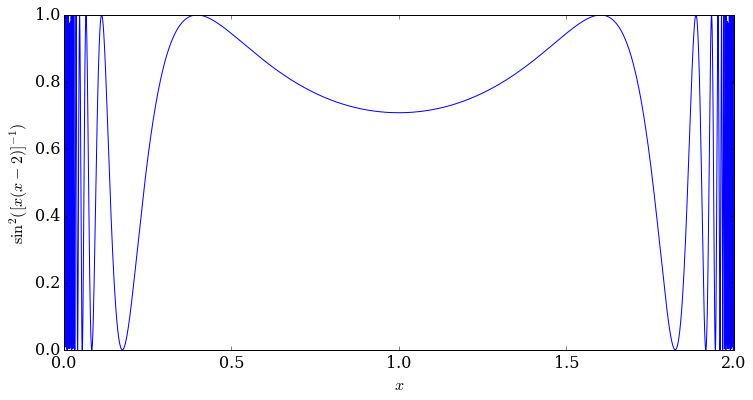

In [5]:
x = numpy.linspace(0.0, 2.0, 10000)
pyplot.plot(x, f(x))
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\sin^2([x(x-2)]^{-1})$");

We see that as the function oscillates *infinitely often*, integrating this with standard methods is going to be very inaccurate.

However, we note that the function is bounded, so the integral (given by the shaded area below) must itself be bounded - less than the total area in the plot, which is $2$ in this case.

/Users/ih3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/ih3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sin
  from ipykernel import kernelapp as app


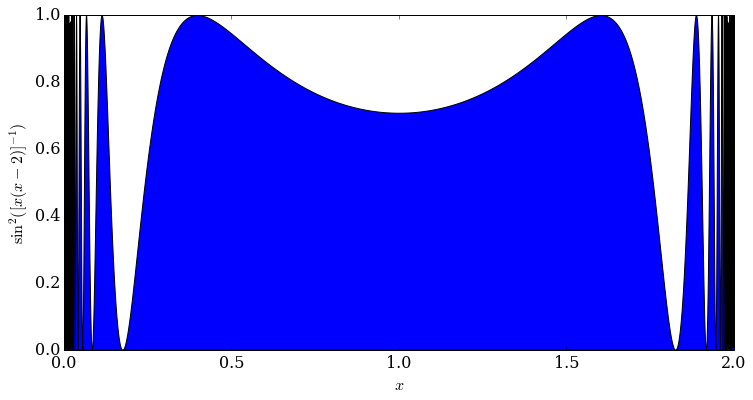

In [6]:
pyplot.fill_between(x, f(x))
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\sin^2([x(x-2)]^{-1})$");

So if we scattered (using a *uniform* random distribution) a large number of points within this box, the fraction of them falling *below* the curve is approximately the integral we want to compute, divided by the area of the box:

$$
\begin{equation}
  I = \int_a^b f(x) \, dx \quad \implies \quad I \simeq \frac{k A}{N}
\end{equation}
$$

where $N$ is the total number of points considered, $k$ is the number falling below the curve, and $A$ is the area of the box. We can choose the box, but we need $y \in [\min_{x \in [a, b]} (f(x)), \max_{x \in [a, b]} (f(x))] = [c, d]$, giving $A = (d-c)(b-a)$.

So let's apply this technique to the function above, where the box in $y$ is $[0,1]$.

In [7]:
def mc_integrate(f, domain_x, domain_y, N = 10000):
    """
    Monte Carlo integration function: to be completed. Result, for the given f, should be around 1.46.
    """
    import numpy.random
    
    return I

### Accuracy

To check the accuracy of the method, let's apply this to calculate $\pi$.

The area of a circle of radius $2$ is $4\pi$, so the area of the *quarter* circle in $x, y \in [0, 2]$ is just $\pi$:

$$
\begin{equation}
  \pi = \int_0^2 \sqrt{4 - x^2} \, dx.
\end{equation}
$$

Check the convergence of the Monte Carlo integration with $N$. (I suggest using $N = 100 \times 2^i$ for $i = 0, \dots, 19$; you should find the error scales roughly as $N^{-1/2}$)

## Mean Value Method

Monte Carlo integration is pretty inaccurate, as seen above: it converges slowly, and has poor accuracy at all $N$. An alternative is the *mean value* method, where we note that *by definition* the average value of $f$ over the interval $[a, b]$ is precisely the integral multiplied by the width of the interval.

Hence we can just choose our $N$ random points in $x$ as above, but now just compute

$$
\begin{equation}
  I \simeq \frac{b-a}{N} \sum_{i=1}^N f(x_i).
\end{equation}
$$

In [8]:
def mv_integrate(f, domain_x, N = 10000):
    """
    Mean value Monte Carlo integration: to be completed
    """
    import numpy.random
    return I

Let's look at the accuracy of this method again applied to computing $\pi$.

The convergence *rate* is the same (only roughly, typically), but the Mean Value method is *expected* to be better in terms of its absolute error.

### Dimensionality

Compared to standard integration methods (Gauss quadrature, Simpson's rule, etc) the convergence rate for Monte Carlo methods is very slow. However, there is one crucial advantage: as you change dimension, the amount of calculation required is *unchanged*, whereas for standard methods it grows geometrically with the dimension.

Try to compute the volume of an $n$-dimensional unit *hypersphere*, which is the object in $\mathbb{R}^n$ such that

$$
\begin{equation}
  \sum_{i=1}^n x_i^2 \le 1.
\end{equation}
$$

The volume of the hypersphere [can be found in closed form](http://en.wikipedia.org/wiki/Volume_of_an_n-ball#The_volume), but can rapidly be computed using the Monte Carlo method above, by counting the $k$ points that randomly fall within the hypersphere and using the standard formula $I \simeq V k / N$.

In [9]:
def mc_integrate_multid(f, domain, N = 10000):
    """
    Monte Carlo integration in arbitrary dimensions (read from the size of the domain): to be completed
    """
    
    return I

In [10]:
from scipy import special

In [11]:
def volume_hypersphere(ndim=3):
    return numpy.pi**(float(ndim)/2.0) / special.gamma(float(ndim)/2.0 + 1.0)

Now let us repeat this across multiple dimensions.

The errors clearly vary over a range, but the convergence remains roughly as $N^{-1/2}$ independent of the dimension; using other techniques such as Gauss quadrature would see the points required scaling geometrically with the dimension.

## Importance sampling

Consider the integral (which arises, for example, in the theory of Fermi gases)

$$
\begin{equation}
  I = \int_0^1 \frac{x^{-1/2}}{e^x + 1} \, dx.
\end{equation}
$$

This has a finite value, but the integrand diverges as $x \to 0$. This *may* cause a problem for Monte Carlo integration when a single value may give a spuriously large contribution to the sum.

We can get around this by changing the points at which the integrand is sampled. Choose a *weighting* function $w(x)$. Then a weighted average of any function $g(x)$ can be

$$
\begin{equation}
  <g>_w = \frac{\int_a^b w(x) g(x) \, dx}{\int_a^b w(x) \, dx}.
\end{equation}
$$

As our integral is

$$
\begin{equation}
  I = \int_a^b f(x) \, dx
\end{equation}
$$

we can, by setting $g(x) = f(x) / w(x)$ get

$$
\begin{equation}
  I = \int_a^b f(x) \, dx = \left< \frac{f(x)}{w(x)} \right>_w \int_a^b w(x) \, dx.
\end{equation}
$$

This gives

$$
\begin{equation}
  I \simeq \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{w(x_i)} \int_a^b w(x) \, dx,
\end{equation}
$$

where the points $x_i$ are now chosen from a *non-uniform* probability distribution with pdf

$$
\begin{equation}
  p(x) = \frac{w(x)}{\int_a^b w(x) \, dx}.
\end{equation}
$$

This is a generalization of the mean value method - we clearly recover the mean value method when the weighting function $w(x) \equiv 1$. A careful choice of the weighting function can mitigate problematic regions of the integrand; e.g., in the example above we could choose $w(x) = x^{-1/2}$, giving $p(x) = x^{-1/2}/2$. In general, the hard part of the algorithm is going to be generating the samples from this non-uniform distribution. Here we have the advantage that $p$ is given by the `numpy.random.power` distribution.

So, let's try to solve the integral above. We need $\int_0^1 w(x) = 2$. The expected solution is around 0.84.So, let's try to solve the integral above. The expected solution is around 0.84.

In the general case, how do we generate the samples from the non-uniform probability distribution $p$?

What really matters here is not the function $p$ from which we draw the random numbers `x`. What really matters is that the random numbers appear to follow the behaviour, the distribution $p$, that we want. This may seem like stating the same thing, but it's not. We can use a technique called *rejection sampling* to construct a set of numbers that follows a certain (cumulative) distribution without having to construct the pdf that it actually follows at all.

To do this, we need to know the distribution we want (here $p(x) = 1/(2 \sqrt{x})$) and another distribution $q(x)$ that we can easily compute with a constant $K$ such that $p(x) \le K q(x)$. What we're doing here is just for illustration, as the *power* distribution $p(x) = a x^{a-1}$ is provided by `numpy.random.power` and perfectly matches the distribution we want for $a=1/2$. Here we're going to need some distribution that diverges faster than $p$ for small $x$, so we can choose the power distribution with $a=1/3$, provided, for example, $K = 1.6$:

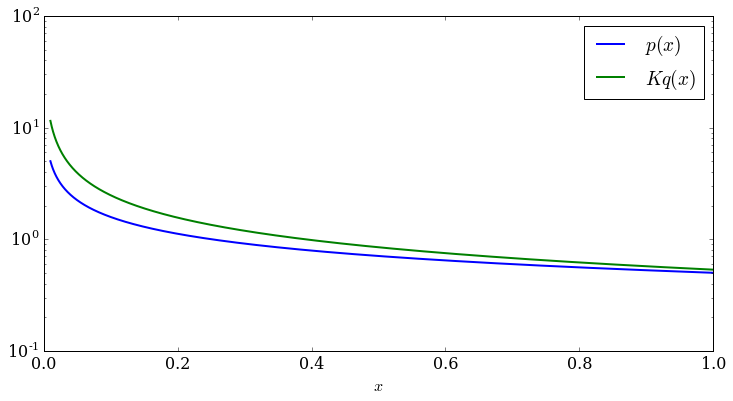

In [12]:
x = numpy.linspace(0.01,1,2000)
p = 1/(2*numpy.sqrt(x))
q = 1/(3*x**(2/3))
K = 1.6
pyplot.semilogy(x, p, lw=2, label=r"$p(x)$")
pyplot.semilogy(x, K * q, lw=2, label=r"$K q(x)$")
pyplot.xlabel(r"$x$")
pyplot.legend()
pyplot.show()

Rejection sampling works by drawing random samples from the easy-to-compute distribution $q$. We then keep the samples drawn from $q$ with a certain probability: if $p(x) / (K q(x)) < U$, where $U$ is drawn from the uniform distribution, then we keep the sample. As we're calculating $p$, not drawing samples from it, this shouldn't be a problem.

Let's check this working:

So now we can write an importance sampling algorithm without having to integrate the weighting function first, by using rejection sampling to find a set of samples from the resulting pdf without actually having to sample it.

We won't do that here, but it's a key conceptual step for MCMC algorithms such as Metropolis Hastings.